In [82]:
from code.quadratic.interpolate import interpolate as qvi_interpolate
from code.quadratic.interpolate import interpolate_test as qvi_interpolate_test
import imageio
import torch
from PIL import Image
import torchvision.transforms as TF
import matplotlib.pyplot as plt
import dataloader_backup
import dataloader
from torch.utils.data import DataLoader

In [2]:
im1 = imageio.imread('created_datasets/ADOBE240/720p_240fps_1__0_0.jpeg')
im2 = imageio.imread('created_datasets/ADOBE240/720p_240fps_1__0_3.jpeg')

im1 = torch.Tensor(im1).permute(2,0,1).float()
im2= torch.Tensor(im2).permute(2,0,1).float()

In [17]:
im1.shape

torch.Size([3, 720, 1280])

In [3]:
out = qvi_interpolate([im1, im2])

torch.Size([3, 720, 1280]) False cpu
torch.Size([3, 720, 1280]) False cpu


IndexError: Dimension out of range (expected to be in range of [-3, 2], but got 3)

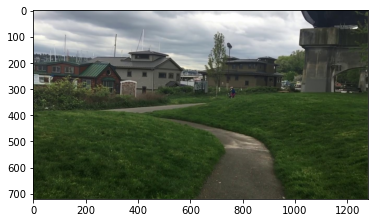

In [8]:
plt.imshow(out.clamp(0,255).int())

## old

In [4]:
input_tensors = [im1, im2]

In [5]:
mean = [0.429, 0.431, 0.397]
std  = [1, 1, 1]

normalize1 = TF.Normalize(mean, [1.0, 1.0, 1.0])
normalize2 = TF.Normalize([0, 0, 0], std)
trans_old = TF.Compose([TF.ToPILImage(), TF.ToTensor(), normalize1, normalize2, ])

In [6]:
for i in range(len(input_tensors)):
    input_tensors[i] = trans_old(input_tensors[i].type(torch.uint8))
    input_tensors[i] = torch.Tensor(input_tensors[i]).unsqueeze(0).float()

In [19]:
out = qvi_interpolate_test(input_tensors)

torch.Size([1, 3, 720, 1280]) True cpu
torch.Size([1, 3, 720, 1280]) True cpu


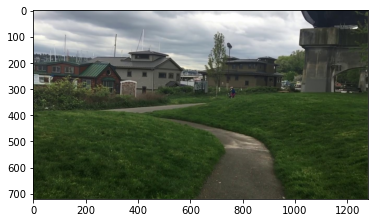

In [20]:
plt.imshow(out.clamp(0,1).mul(255).detach().cpu().squeeze().permute(1,2,0).int())

## new

In [15]:
def normalize_batch(tensor, mean, sd):
    mean = torch.tensor(mean).view(3,1,1).to(tensor.device)
    sd   = torch.tensor(sd).view(3,1,1).to(tensor.device)

    mean = mean.contiguous()
    sd   = sd.contiguous()

    return (tensor-mean) / sd

In [59]:
dataset = dataloader_backup.adobe240_dataset()
dataset = dataloader_backup.TransformedDataset(dataset, random_crop=False, channels_first=True)

In [83]:
dataset = dataloader.adobe240_dataset()
dataset = dataloader.TransformedDataset(dataset, random_crop=False, channels_first=True)

In [84]:
dl = DataLoader(dataset, batch_size=1)

In [86]:
for X, y in dl:
    break

In [87]:
x1, x2 = X.unbind(dim=1)

In [88]:
x1 = x1.cuda()
x2 = x2.cuda()
y = y.cuda()

In [89]:
out = qvi_interpolate([x1,x2])

torch.Size([1, 3, 720, 1280]) True cuda:0
torch.Size([1, 3, 720, 1280]) True cuda:0


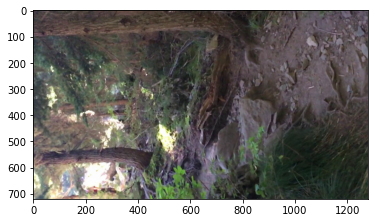

In [66]:
plt.imshow(out.detach().cpu().mul(255).clamp(0,255).squeeze(0).permute(1,2,0).int())